<a href="https://colab.research.google.com/github/NiyazovIlia/PyTorch-1/blob/lesson-8/HW_PyTorch_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import math

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = (torch.sin(train_data[:, 0])/train_data[:, 0]) - (train_data[:, 0]/10)
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

In [ ]:
train_set

[(tensor([ 3.7450, -0.5260]), tensor(0.)),
 (tensor([0.3463, 0.9455]), tensor(0.)),
 (tensor([ 5.6665, -0.6687]), tensor(0.)),
 (tensor([0.4957, 0.9100]), tensor(0.)),
 (tensor([2.2053, 0.1447]), tensor(0.)),
 (tensor([ 5.9295, -0.6514]), tensor(0.)),
 (tensor([ 5.3492, -0.6852]), tensor(0.)),
 (tensor([0.9680, 0.7542]), tensor(0.)),
 (tensor([ 5.8133, -0.6592]), tensor(0.)),
 (tensor([2.1580, 0.1700]), tensor(0.)),
 (tensor([ 6.2771, -0.6287]), tensor(0.)),
 (tensor([ 5.3748, -0.6842]), tensor(0.)),
 (tensor([ 2.9895, -0.2483]), tensor(0.)),
 (tensor([2.0337, 0.2366]), tensor(0.)),
 (tensor([ 5.2584, -0.6884]), tensor(0.)),
 (tensor([ 5.4631, -0.6802]), tensor(0.)),
 (tensor([ 3.1145, -0.3028]), tensor(0.)),
 (tensor([ 3.0333, -0.2677]), tensor(0.)),
 (tensor([1.0687, 0.7134]), tensor(0.)),
 (tensor([ 2.7712, -0.1465]), tensor(0.)),
 (tensor([0.1439, 0.9822]), tensor(0.)),
 (tensor([2.3943, 0.0445]), tensor(0.)),
 (tensor([ 4.0241, -0.5943]), tensor(0.)),
 (tensor([ 5.1249, -0.6912]),

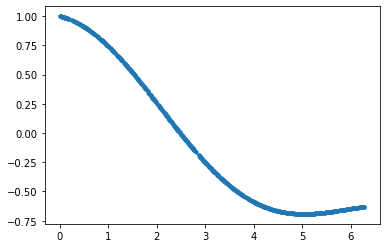

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )
    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
n_epochs = 200  # количество эпох
lr = 0.0002  # шаг обучения

b1 = 0.5  # гиперпараметр для оптимайзера Adam
b2 = 0.999  # гиперпараметр для оптимайзера Adam

latent_dim = 100  # Размерность случайного вектора, который подается на вход генератору

sample_interval = 500  # количество итераций для отображения процесса обучения

In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Для каждой нейронки свой опитимизатор
optimizer_G = torch.optim.Adam(
    generator.parameters(),
    lr=lr, 
    betas=(b1, b2)
)
optimizer_D = torch.optim.Adam(
    discriminator.parameters(), 
    lr=lr, 
    betas=(b1, b2)
)

# Но вот функция ошибки у нас будет одна общая
adversarial_loss = torch.nn.BCELoss()

In [ ]:
d_loss_history = []
g_loss_history = []

In [ ]:
for epoch in range(n_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Данные для обучения дискриминатора
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        # Обучение дискриминатора
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = adversarial_loss(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_D.step()
        # Данные для обучения генератора
        latent_space_samples = torch.randn((batch_size, 2))
        # Обучение генератора
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = adversarial_loss(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_G.step()
        # Показать ошибку
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.6504845023155212
Epoch: 0 Loss G.: 0.6721874475479126
Epoch: 0 Loss D.: 0.6436079740524292
Epoch: 0 Loss G.: 0.6790587902069092
Epoch: 0 Loss D.: 0.6358855962753296
Epoch: 0 Loss G.: 0.6693841218948364
Epoch: 0 Loss D.: 0.6414862275123596
Epoch: 0 Loss G.: 0.6755834221839905
Epoch: 0 Loss D.: 0.6246877908706665
Epoch: 0 Loss G.: 0.6822267770767212
Epoch: 0 Loss D.: 0.6101246476173401
Epoch: 0 Loss G.: 0.680322527885437
Epoch: 0 Loss D.: 0.5941847562789917
Epoch: 0 Loss G.: 0.6784390211105347
Epoch: 0 Loss D.: 0.5836411714553833
Epoch: 0 Loss G.: 0.6824772357940674
Epoch: 0 Loss D.: 0.5999984741210938
Epoch: 0 Loss G.: 0.669795572757721
Epoch: 0 Loss D.: 0.6044448614120483
Epoch: 0 Loss G.: 0.6831931471824646
Epoch: 0 Loss D.: 0.5558983087539673
Epoch: 0 Loss G.: 0.680211067199707
Epoch: 0 Loss D.: 0.5766326189041138
Epoch: 0 Loss G.: 0.6826887726783752
Epoch: 0 Loss D.: 0.5462386608123779
Epoch: 0 Loss G.: 0.6876553893089294
Epoch: 0 Loss D.: 0.5509759783744812
Epoc

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

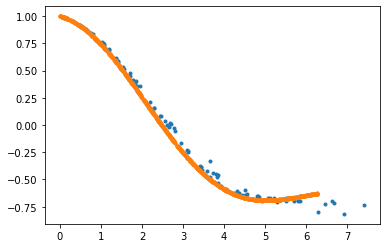

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
plt.plot(train_data[:, 0], train_data[:, 1], ".")